In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [2]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


In [3]:
strava.shape

(268, 10)

The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [4]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head(10)

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780
2018-02-10 06:18:03+11:00,02/10/18,06:18:03,2018_02_10_06_18_03.json,189.918,0.70865,125.8670,1.31962,1.54810,212.977,0.79469,...,0,0,0,0,0,0,0,212.726,0.79375,147.7970
2018-02-11 07:21:37+11:00,02/11/18,07:21:37,2018_02_11_07_21_37.json,166.737,0.62215,12.4939,1.24269,1.60488,192.338,0.71768,...,0,0,0,0,0,0,0,192.117,0.71685,15.7590
2018-02-11 07:46:02+11:00,02/11/18,07:46:02,2018_02_11_07_46_02.json,227.134,0.84751,59.7968,1.14548,1.49494,244.770,0.91332,...,0,0,0,0,0,0,0,244.500,0.91231,69.2902
2018-02-13 08:19:36+11:00,02/13/18,08:19:36,2018_02_13_08_19_36.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-15 07:07:12+11:00,02/15/18,07:07:12,2018_02_15_07_07_12.json,208.745,0.77890,143.8520,1.42820,1.67028,224.096,0.83618,...,0,0,0,0,0,0,0,222.957,0.83193,155.9740


In [5]:
cheetah.shape

(251, 362)

The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Your Tasks

Your first task is to combine these two data frames using the [`join` method of Pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#joining-on-index).   The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [6]:
df=strava.join(cheetah, how = 'inner')
df.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-01-31 21:13:34+00:00,109.8,19.0,143.0,False,26.3,649,612.00 m,6,113,Ride,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


## Required Analysis

1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides
* Look at the distributions of some key variables: time, distance, average speed, average power, TSS. Are they normally distributed? Skewed? 
* Explore the relationships between the following variables. Are any of them corrolated with each other (do they vary together in a predictable way)? Can you explain any relationships you observe?  
    * Distance
    * Moving Time
    * Average Speed
    * Heart Rate
    * Power (watts)
    * Normalised power (NP)
    * Training Stress Score
    * Elevation Gain
* We want to explore the differences between the three categories: `Race`, `Workout` and `Ride`.
    * Use scatter plots with different colours for each category to explore how these categories differ.  
    * Use histograms or box plots to visualise the different distributions of a variable for the three categories.
    * In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example).
* We want to explore relationship between `rides` and `weather`. In order to carry out this analysis, you need `weather` data from relevant source. For your convenience, we have downloaded temperature data from [Bureau of Meterology](http://www.bom.gov.au/). You can find temperature under `Maximum temperature (Degree C)` column which represents maximum temperature for the day. Under the `data` directory, you get `weather_data_2018.csv` and `weather_data_2019.csv` files from where you can read daily temperatures. In order to get temperature for a day so that you can use in your combined dataframe (joining Strava and Cheetah datasets), you need to make `date` column consistent in both dataframes. 
    * Make `date` column consistent across both `weather` and `rides` datasets so that you can get `Maximum temperature` for the day of the ride. 
    * Can you find any relationship between distance travelled per ride and the temperature?
    * Can you find any relatioship between Average speed of ride and the temperature?


## Challenge

* What leads to more `kudos`? Is there anything to indicate which rides are more popular? Explore the relationship between the main variables and kudos. Show a plot and comment on any relationship you observe. 

* Generate a plot that summarises the number of km ridden each month over the period of the data. Overlay this with the _sum_ of the Training Stress Score and the _average_ of the Average Speed to generate an overall summary of activity.

* Generate a similar graph but one that shows the activity over a given month, with the sum of the values for each day of the month shown.  So, if there are two rides on a given day, the graph should show the sum of the distances etc for these rides.

Hint: to generate these summary plots you need to use the [timeseries/date functionality](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) in Pandas to generate a new data frame containing the required data.  

__Note:__ once you have completed these steps you can remove this cell.  Use the text as a starting point for the documentation of your workflow and discussion of results.


# Analysis

### ***1. Remove rides with no measured power (where device_watts is False) - these are commutes or MTB rides***

In [7]:
df_remove1= df.drop(df.index[(df['device_watts'] != True)])
df_remove1

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,0,222.856,0.831550,20.2257
2018-01-27 20:01:32+00:00,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,0,245.365,0.915540,94.5787
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,0,253.702,0.946650,98.3269
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,0,232.644,0.868080,171.0780
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,0,212.726,0.793750,147.7970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-19 20:22:49+00:00,NaN,3.0,166.8,True,58.2,174,666.00 m,16,136,Ride,...,0,0,0,0,0,0,0,222.988,0.832045,159.3630
2019-07-26 20:12:56+00:00,120.8,7.0,166.9,True,59.6,185,663.00 m,15,139,Ride,...,0,0,0,0,0,0,0,236.028,0.880701,183.1140
2019-07-27 20:42:59+00:00,122.0,3.0,168.4,True,19.8,49,247.00 m,6,47,Ride,...,0,0,0,0,0,0,0,212.020,0.791118,51.1646
2019-07-27 21:47:24+00:00,144.4,3.0,235.2,True,29.1,50,415.00 m,15,50,Race,...,0,0,0,0,0,0,0,267.699,0.998877,83.5620


## ***2. Distributions of some key variables: time, distance, average speed, average power, TSS_***

***2.1 Distribution of time***

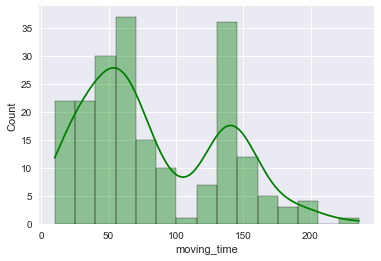

In [8]:
sns.histplot(data = df_remove1['moving_time'],color = 'green',
alpha = 0.4, bins = 15, kde = True)
plt.show()

Look at the graph above, we can see that ***moving time is skewed right***

***2.2. Distribution of Distance***

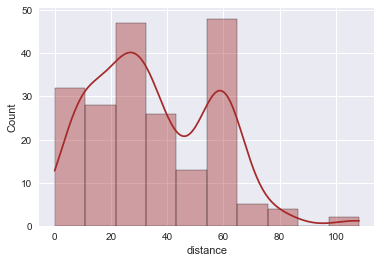

In [9]:
sns.histplot(data = df_remove1['distance'], color = 'brown',
alpha = 0.4, bins = 10, kde = True)
plt.show()

***Distance is skewed right***

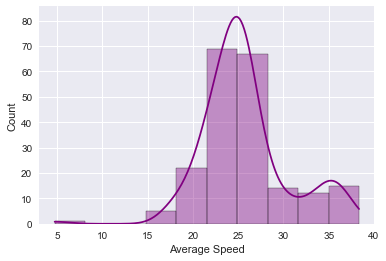

In [10]:
sns.histplot(data = df_remove1['Average Speed'], color = 'purple',
alpha = 0.4, bins = 10, kde = True)
plt.show()

***Average Speed is skewed right***

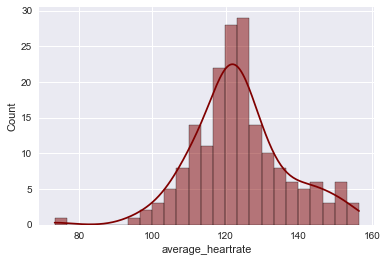

In [11]:
sns.histplot(data = df_remove1['average_heartrate'],color = 'maroon',
alpha = 0.5, bins = 25, kde = True)
plt.show()

***Average heartrace is normally distributed***

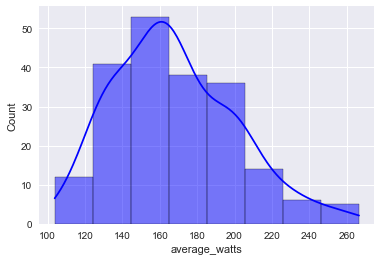

In [12]:
sns.histplot(data = df_remove1['average_watts'], alpha = 0.5,
color = 'blue', bins = 8, kde = True)
plt.show()

***Average watts is skewed right***

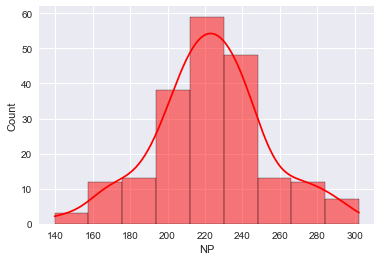

In [13]:
sns.histplot(data = df_remove1['NP'], alpha = 0.5,color ='red', bins = 9, kde = True)
plt.show()

***NP is normal distribution***

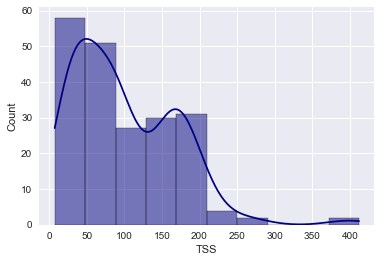

In [14]:
sns.histplot(data = df_remove1['TSS'], alpha = 0.5,
color = 'navy', bins = 10, kde = True)
plt.show()

***TSS is skewed right distribution***

In [15]:
df[['Distance','Time Moving','Average Speed','Average Heart Rate','Average Power','NP', 'TSS', 'Elevation Gain']].corr()

,Distance,Time Moving,Average Speed,Average Heart Rate,Average Power,NP,TSS,Elevation Gain
Distance,1.000000,0.919503,0.354867,0.184314,0.283723,0.347356,0.880134,0.778807
Time Moving,0.919503,1.000000,0.069329,0.042223,0.040703,0.123754,0.780089,0.813204
Average Speed,0.354867,0.069329,1.000000,0.316336,0.775712,0.707347,0.340263,0.062132
Average Heart Rate,0.184314,0.042223,0.316336,1.000000,0.335747,0.264890,0.209751,0.038658
Average Power,0.283723,0.040703,0.775712,0.335747,1.000000,0.955567,0.500283,0.000880
NP,0.347356,0.123754,0.707347,0.264890,0.955567,1.000000,0.591343,0.124392
TSS,0.880134,0.780089,0.340263,0.209751,0.500283,0.591343,1.000000,0.722277
Elevation Gain,0.778807,0.813204,0.062132,0.038658,0.000880,0.124392,0.722277,1.000000


Distance is corrolated with Time Moving, TSS, Elevation Gain

# ***3. CHECKING THE CORRELATION***
## ***3.1 Explore the relationships between the following variables:***
* Distance
* Moving Time
* Average Speed
* Heart Rate
* Power (watts)
* Normalised power (NP)
* Training Stress Score
* Elevation Gain

In [16]:
#print(df_remove1.columns.values.tolist())

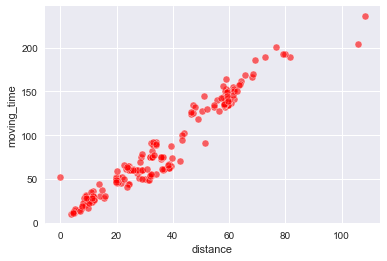

In [17]:
sns.scatterplot(data = df_remove1, x = df_remove1['distance'], y = df_remove1['moving_time'],
alpha = 0.6, color = 'red')
plt.show()

There are strong positive relationship between ***moving time and distance***

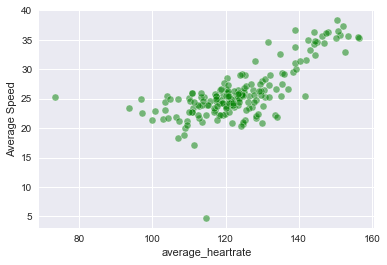

In [18]:
sns.scatterplot(data = df_remove1, x = df_remove1['average_heartrate'], y = df_remove1['Average Speed'],alpha = 0.5, color = 'green')
plt.show()

There are positive relationship between ***average heartrate and average speed***

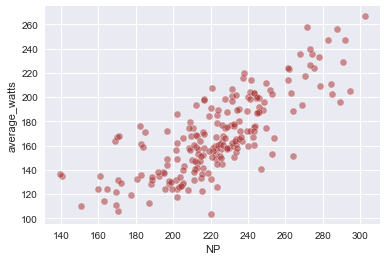

In [19]:
sns.scatterplot(data = df_remove1, x = df_remove1['NP'], y = df_remove1['average_watts'],
alpha = 0.5, color = 'brown')
plt.show()

There are relatively positive relationship between ***Average power generated
and Normalized power***

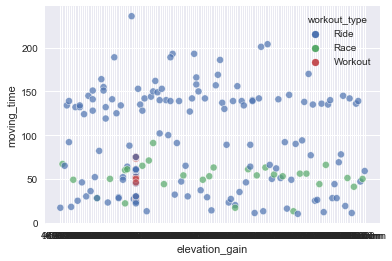

In [20]:
sns.scatterplot(data = df_remove1, x = df_remove1['elevation_gain'], y = df_remove1['moving_time'],
alpha = 0.7, color = 'red', hue ='workout_type')
plt.show()

As demonstrated by the scatter plot, the relationship between the two parameters ***elevation gain and moving time is not clear***

In [21]:
df_remove1.columns

Index(['average_heartrate', 'average_temp', 'average_watts', 'device_watts',
       'distance', 'elapsed_time', 'elevation_gain', 'kudos', 'moving_time',
       'workout_type',
       ...
       'Rest AVNN', 'Rest SDNN', 'Rest rMSSD', 'Rest PNN50', 'Rest LF',
       'Rest HF', 'HRV Recovery Points', 'NP', 'IF', 'TSS'],
      dtype='object', length=372)

In [22]:
# Create new dataframe to compare 8 variables
df_correlation = df_remove1[['distance', 'moving_time', 'Average Speed', 'average_heartrate','average_watts'
                             , 'NP', 'TSS', 'elevation_gain']] 
df_correlation.head()

,distance,moving_time,Average Speed,average_heartrate,average_watts,NP,TSS,elevation_gain
2018-01-27 19:39:49+00:00,7.6,17,26.0234,120.6,153.4,222.856,20.2257,95.00 m
2018-01-27 20:01:32+00:00,38.6,67,34.4380,146.9,187.7,245.365,94.5787,449.00 m
2018-02-05 21:06:42+00:00,24.3,65,22.2417,119.3,165.9,253.702,98.3269,439.00 m
2018-02-07 06:59:05+00:00,47.1,134,20.7841,124.8,151.0,232.644,171.0780,890.00 m
2018-02-09 19:18:03+00:00,59.8,139,25.6585,123.0,145.9,212.726,147.7970,656.00 m


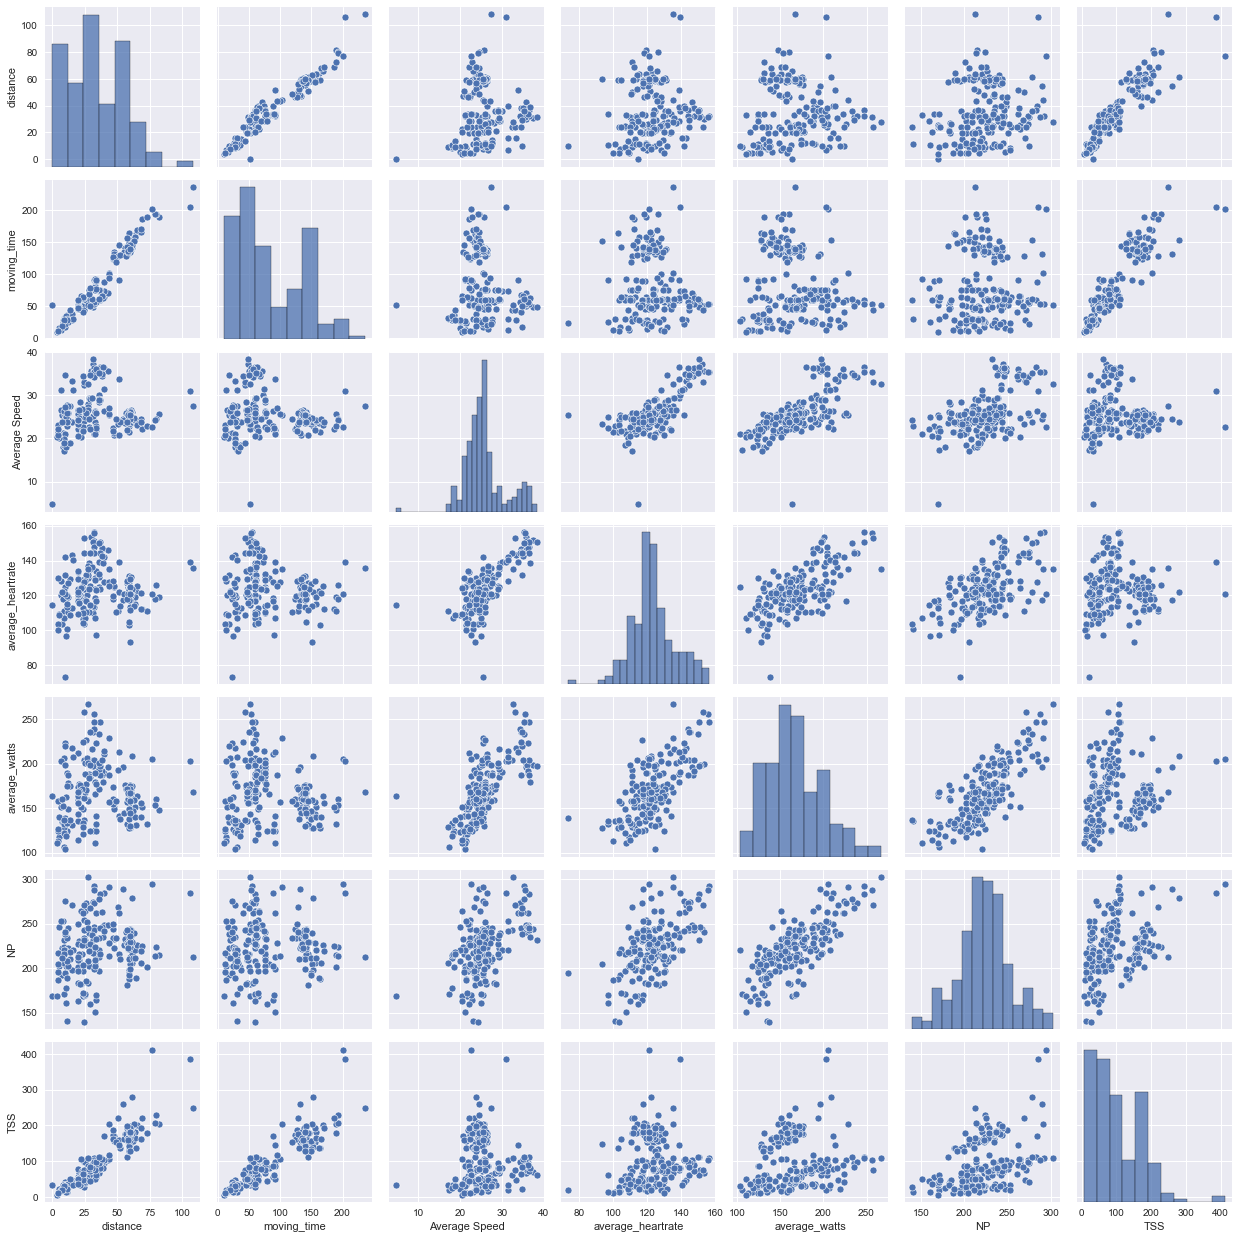

In [23]:
sns.pairplot(data = df_correlation)
plt.show()

The diagrams above clearly demonstrate the existence of strong relationships.***Distance-moving time, distance-TSS, moving time-TSS, average speed-average heart rate, average speed-average watts*** are just a few of the pairs with such a strong connection.

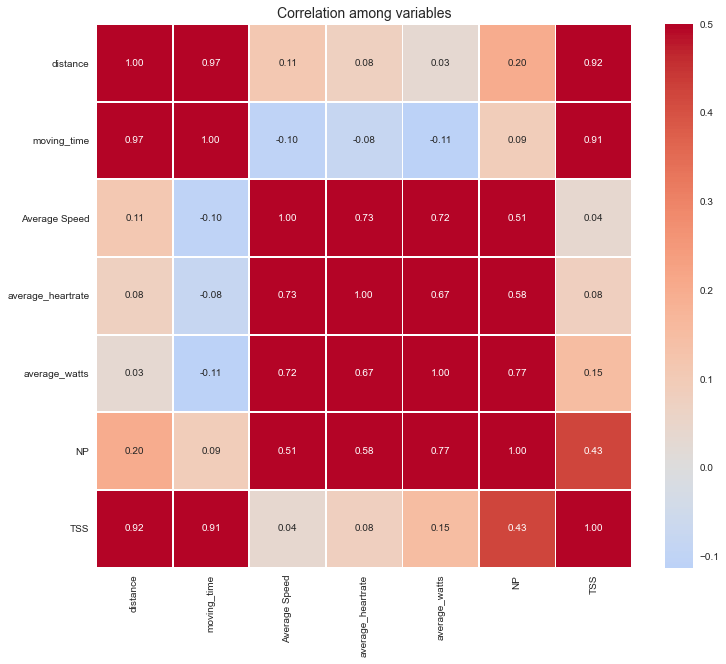

In [24]:
a = sns.heatmap(data = df_correlation.corr(), vmax = 0.5,
cmap = 'coolwarm', center = 0,
annot = True, fmt = '.2f',
linewidths = 0.8)
a.figure.set_size_inches(12,10)
plt.title('Correlation among variables', fontsize = 14)
plt.show()

## 4. Explore the differences between the three categories: ***Race, Workout and Ride.***
* Use ***scatter plots*** with different colours for each category to explore how these categories differ.
* Use ***histograms or box plots*** to visualise the different distributions of a variable for the three categories.
* In both cases, experiment with different variables but only include those that are interesting in your final notebook (if none are interesting, show us a representative example)

#### ***4.1.Use scatter plots with different colours for each category to explore how these categories differ.***

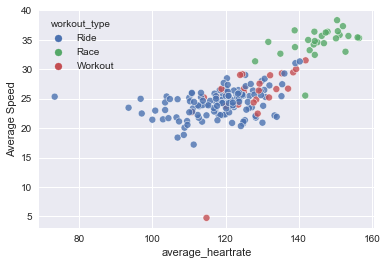

In [25]:
sns.scatterplot( data = df_remove1, x = df_remove1['average_heartrate'],
                 y = df_remove1['Average Speed'],
alpha = 0.8, hue = 'workout_type')
plt.show()

Three categories are illustrated in ascending order of the speed parameter: ***Ride, Race, and Workout*** from the chart above. ***Ride*** has the ***lowest average heart rate and average speed***, while ***Race*** has two of the ***highest parameters*** in comparison to the other two segments.

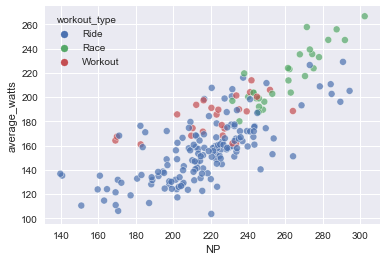

In [26]:
sns.scatterplot(data = df_remove1, x = df_remove1['NP'], y = df_remove1['average_watts'],
alpha = 0.7, hue = df_remove1['workout_type'])
plt.show()

The graph chart show the ascending order of the power generated parameter of ***ride, race and workout***.While the figure for ***Ride*** is ***lowest normalized power***. In contrast, ***Race*** has ***two highest parameters*** compared with others. 

<AxesSubplot:xlabel='distance', ylabel='moving_time'>

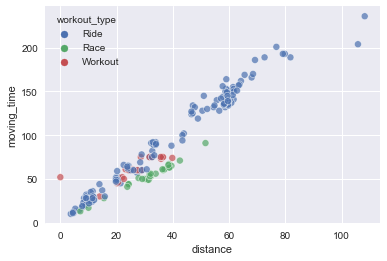

In [27]:
sns.scatterplot(data = df_remove1, x = df_remove1['distance'], y = df_remove1['moving_time'],
alpha = 0.7, hue = df_remove1['workout_type'])

Three categories are illustrated in ascending order of the moving time parameter: ***Ride, Race, and Workout***.The other two groups have more comparable data, remaining at a lower degree than the Ride category. The ***Ride*** group covers greater distances and travels at a slower pace.

#### ***4.2 Use histograms or box plots to visualise the different distributions of a variable for the three categories***

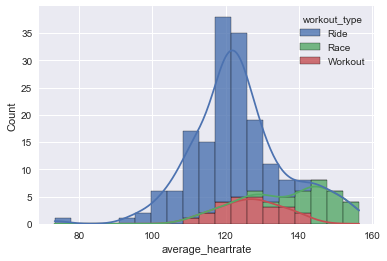

In [28]:
sns.histplot(data=df_remove1, x = 'average_heartrate', alpha = 0.8,
hue = 'workout_type', multiple ='stack', kde = True)
plt.show()

Regardless of their massive discrepancy in data size, both group ***Ride or Workout*** has a central position of roughly 120 units. The race group occupies a more central position, at around 130 units.

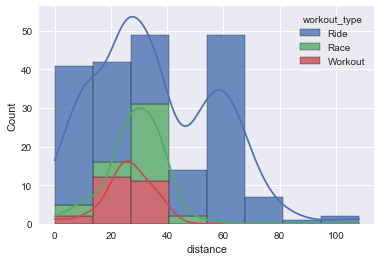

In [29]:
sns.histplot(data = df_remove1, x = 'distance', alpha = 0.8,
bins = 8, hue = 'workout_type',
multiple ='stack', kde = True)
plt.show()

The central position of both group ***Ride or Workout*** are approximately 30 units. Except for the fact that the ***race*** group has an immense quantity of data in comparison towards the other two, it has central positions that are approximately 40 and 60 units higher.

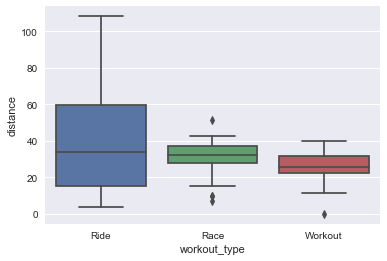

In [30]:
sns.boxplot(data = df_remove1, x = df_remove1['workout_type'], y = df_remove1['distance'])
plt.show()

The box plot diagram demonstrates that the ***upper limit*** ranges for the ***ride*** category is greater than 100, while the figure for the rest parameters have shorter and lower ***variation ranges***. Consequently, all three groups share a ***median value*** of approximately 35 units. Likewise, when considering ***outliers***, the ***Race*** group has outliers on both sides of the plot, ***Workout*** has outliers only on the lower range of the plot, and Ride has none.

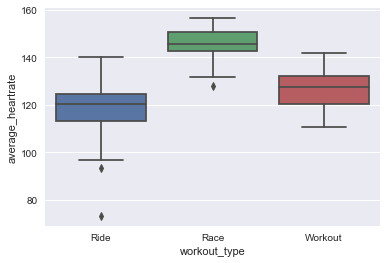

In [31]:
sns.boxplot(data = df_remove1, x = 'workout_type', y = 'average_heartrate')
plt.show()

The box plot diagram illustrates the data regarding ***heart rate***; the ***Race*** category has ***upper limit*** range of nearly 160 units, while the other two categories have a lower ***variation range***, reaching a peak at 140 units. Additionally, each of the three groups has a unique ***median value***. Likewise, when outliers are considered, the ***Race*** group seems to have more points in the lower range of the plot than the ***Ride*** group, while ***Workout*** has none.

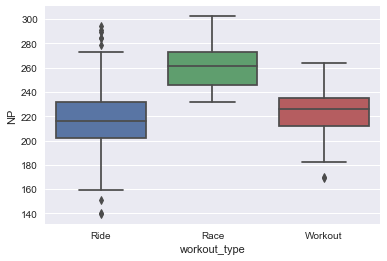

In [32]:
sns.boxplot(data = df_remove1, x = 'workout_type', y = 'NP')
plt.show()

The box plot diagram illustrates the data for ***normalized power, Race*** categories, which have upper limit over 300 units, while the figures for the other two have a wider ***variation range*** but a maximum of less than 280 units.Additionally, each of the three groups has a distinct ***median value***. Furthermore, when outliers are considered, the ***Ride*** group has more points on both sides of the plot than the ***Workout*** group, while ***Race*** has none.

## 5. Explore Relationship
**Data Source**: [Bureau of Meterology](http://www.bom.gov.au/)

**Parameters**: Weather,Rides

In weather take column Maximum temperature (Degree C)
* Make date column consistent across both weather and rides datasets so that you can get Maximum temperature for the day of
the ride.
* Can you find any relationship between distance travelled per ride and the temperature?
* Can you find any relatioship between Average speed of ride and the temperature?

In [33]:
#Merging 2 files
weather_2018 = pd.read_csv('data/weather_data_2018.csv')
weather_2019 = pd.read_csv('data/weather_data_2019.csv')
weather = pd.concat([weather_2018,weather_2019])
weather.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y
1,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y
2,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y
3,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y
4,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y


In [34]:
weather.shape

(730, 8)

In [35]:
# linking columns to set new index for date # convert to datetime
weather['Month'] = weather['Month'].astype(str).str.zfill(2)
weather['Day'] = weather['Day'].astype(str).str.zfill(2)
weather['Year'] = weather['Year'].astype(str)
weather['Date'] = weather['Year'] + weather['Month'] + weather['Day']
weather['Date'] = pd.to_datetime(weather['Date'], format = '%Y%m%d')
weather = weather.set_index('Date')
weather.tail()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
Date,,,,,,,,
2019-12-27,IDCJAC0010,66212,2019,12,27,30.1,1.0,Y
2019-12-28,IDCJAC0010,66212,2019,12,28,33.8,1.0,Y
2019-12-29,IDCJAC0010,66212,2019,12,29,30.7,1.0,Y
2019-12-30,IDCJAC0010,66212,2019,12,30,33.2,1.0,Y
2019-12-31,IDCJAC0010,66212,2019,12,31,44.4,1.0,Y


In [36]:
df_remove1['Date'] = df_remove1.index.date
df_remove1['Time'] = df_remove1.index.time
df_2 = df_remove1.set_index('Date')
df_2.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,Time
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-27,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,0,222.856,0.83155,20.2257,19:39:49
2018-01-27,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,0,0,0,0,0,0,245.365,0.91554,94.5787,20:01:32
2018-02-05,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,0,253.702,0.94665,98.3269,21:06:42
2018-02-07,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,0,232.644,0.86808,171.0780,06:59:05
2018-02-09,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,0,212.726,0.79375,147.7970,19:18:03


In [37]:
df_merge = df_2.join(weather, how = 'inner')
df_merge.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,TSS,Time,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-27,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,20.2257,19:39:49,IDCJAC0010,66212,2018,01,27,30.4,1.0,Y
2018-01-27,146.9,22.0,187.7,True,38.6,67,449.00 m,19,67,Race,...,94.5787,20:01:32,IDCJAC0010,66212,2018,01,27,30.4,1.0,Y
2018-02-05,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,98.3269,21:06:42,IDCJAC0010,66212,2018,02,05,27.4,1.0,Y
2018-02-07,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,171.0780,06:59:05,IDCJAC0010,66212,2018,02,07,28.1,1.0,Y
2018-02-09,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,147.7970,19:18:03,IDCJAC0010,66212,2018,02,09,31.9,1.0,Y


In [38]:
df_ride = df_merge[df_merge['workout_type'] == 'Ride']
df_ride.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,TSS,Time,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-27,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,20.2257,19:39:49,IDCJAC0010,66212,2018,01,27,30.4,1.0,Y
2018-02-05,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,98.3269,21:06:42,IDCJAC0010,66212,2018,02,05,27.4,1.0,Y
2018-02-07,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,171.0780,06:59:05,IDCJAC0010,66212,2018,02,07,28.1,1.0,Y
2018-02-09,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,147.7970,19:18:03,IDCJAC0010,66212,2018,02,09,31.9,1.0,Y
2018-02-10,103.9,17.0,134.9,True,7.8,19,92.00 m,8,18,Ride,...,15.7590,20:21:37,IDCJAC0010,66212,2018,02,10,30.3,1.0,Y


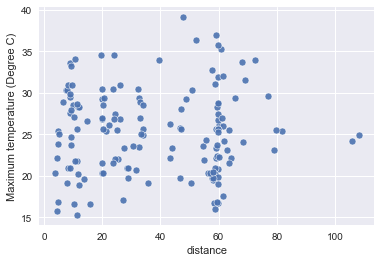

In [39]:
sns.scatterplot(data = df_ride, x = df_ride['distance'], y = df_ride['Maximum temperature (Degree C)'
],alpha = 0.9)
plt.show()

The diagram above show the relationship between the temperature and the distance is not clear. Additionally, the large proportion of the dataset contains distance values less than 65 kilometers.

In [40]:
df_ride[['Average Speed','Maximum temperature (Degree C)']]

,Average Speed,Maximum temperature (Degree C)
Date,,
2018-01-27,26.0234,30.4
2018-02-05,22.2417,27.4
2018-02-07,20.7841,28.1
2018-02-09,25.6585,31.9
2018-02-10,25.3779,30.3
...,...,...
2019-07-13,22.2826,15.8
2019-07-19,25.4524,20.5
2019-07-26,25.5036,19.0


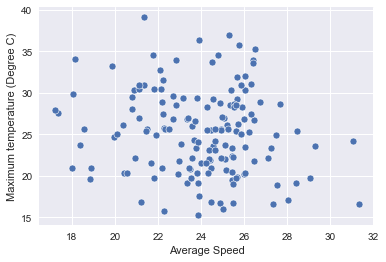

In [41]:
sns.scatterplot(data = df_ride, x = df_ride['Average Speed'],
                y = df_ride['Maximum temperature (Degree C)'
],alpha = 1)
plt.show()

The diagram above show the relationship between the temperature and the average speed is not clear. Additionally, the large proportion of the dataset contains average speed on the values range from 20 to 28 kilometers.

### Finished Porfolio 1